In [69]:
import torch

from transformers import BertTokenizer
from PIL import Image
import argparse

from models import caption
from datasets import coco, utils
from configuration import Config
import os 

In [2]:
model = torch.hub.load('saahiluppal/catr', 'v3', pretrained=True)

Using cache found in C:\Users\86158/.cache\torch\hub\saahiluppal_catr_master
D:\3D66\anaconda\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
D:\3D66\anaconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [41]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
start_token = tokenizer.convert_tokens_to_ids(tokenizer._cls_token)
end_token = tokenizer.convert_tokens_to_ids(tokenizer._sep_token)

In [70]:
image = Image.open('image/10.png')
image = coco.val_transform(image)
image = image.unsqueeze(0)

In [71]:
def create_caption_and_mask(start_token, max_length):
    caption_template = torch.zeros((1, max_length), dtype=torch.long)
    mask_template = torch.ones((1, max_length), dtype=torch.bool)

    caption_template[:, 0] = start_token
    mask_template[:, 0] = False

    return caption_template, mask_template


@torch.no_grad()
def evaluate():
    model.eval()
    for i in range(config.max_position_embeddings - 1):
        predictions = model(image, caption, cap_mask)
        predictions = predictions[:, i, :]
        predicted_id = torch.argmax(predictions, axis=-1)

        if predicted_id[0] == 102:
            return caption

        caption[:, i+1] = predicted_id[0]
        cap_mask[:, i+1] = False

    return caption

In [72]:
config = Config()
caption, cap_mask = create_caption_and_mask(start_token, config.max_position_embeddings)

In [73]:
output = evaluate()
result = tokenizer.decode(output[0].tolist(), skip_special_tokens=True)
#result = tokenizer.decode(output[0], skip_special_tokens=True)


1
torch.Size([1, 2048, 19, 17])
1
torch.Size([1, 2048, 19, 17])
1
torch.Size([1, 2048, 19, 17])
1
torch.Size([1, 2048, 19, 17])
1
torch.Size([1, 2048, 19, 17])
1
torch.Size([1, 2048, 19, 17])
1
torch.Size([1, 2048, 19, 17])
1
torch.Size([1, 2048, 19, 17])
1
torch.Size([1, 2048, 19, 17])
1
torch.Size([1, 2048, 19, 17])
1
torch.Size([1, 2048, 19, 17])
1
torch.Size([1, 2048, 19, 17])
1
torch.Size([1, 2048, 19, 17])
1
torch.Size([1, 2048, 19, 17])


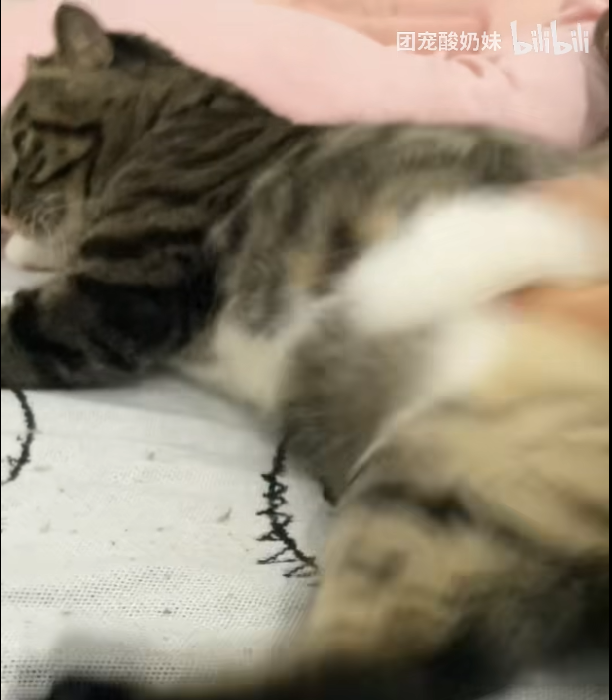

In [74]:
from IPython.display import Image
Image('image/10.png')

In [75]:
print(result.capitalize())

A cat laying on top of a bed next to a wall.
